## 基本信息画像

In [1]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [224]:
teacher=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\1_teacher.csv")
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")

In [225]:
# 教师信息
teacher.columns=['学期','班级id','班级名','年级名','学科id','学科名','教师id','教师名']
t_term=teacher['学期'].unique().shape[0]
t_name=teacher['教师名'].unique().shape[0]
t_subject=teacher['学科名'].unique().shape[0]
t_class=teacher['班级名'].unique().shape[0]
print("教师信息_学期数量：",t_term)
print('教师信息_教师数量：',t_name)
print('教师信息_学科数量：',t_subject)
print('教师信息_班级数量：',t_class)
print('教师信息_学期分布：',teacher['学期'].unique())
#print('教师信息_班级名类型：',teacher['班级名'].unique())
teacher.head(5)

教师信息_学期数量： 9
教师信息_教师数量： 73
教师信息_学科数量： 19
教师信息_班级数量： 86
教师信息_学期分布： ['2014-2015-1' '2014-2015-2' '2015-2016-1' '2015-2016-2' '2016-2017-1'
 '2016-2017-2' '2017-2018-1' '2017-2018-2' '2018-2019-1']


,学期,班级id,班级名,年级名,学科id,学科名,教师id,教师名
0,2014-2015-1,708,高二(02),高二,1,语文,224,徐老师
1,2014-2015-1,708,高二(02),高二,2,数学,94,张老师
2,2014-2015-1,708,高二(02),高二,3,英语,134,张老师
3,2014-2015-1,708,高二(02),高二,4,物理,151,陈老师
4,2014-2015-1,708,高二(02),高二,6,生物,253,史老师


#### 从教师信息表中可以看出：73个教师是在9个学期内的信息，并且总共有19个学科,学期是从2014到2019年这9个学期

In [226]:
# 当前在校学生信息
student_info.columns=[u'学生id',u'学生姓名',u'性别',u'民族',u'出生日期',u'班级名',u'家庭住址',u'家庭类型',u'政治面貌',u'班级id',u'班级学期',u'是否住校',u'是否退学',u'宿舍号']
# student_info['是否退学'].fillna(value=0) #将NaN替换为0
#print(student_info.dtypes) # 查看dataframe中的数据类型
n_student=student_info['学生id'].unique().shape[0]
n_class=student_info['班级名'].unique().shape[0]
n_term=student_info['班级学期'].unique().shape[0]
print("学生信息_学生数量：",n_student)
print('学生信息_班级数量：',n_class)
print('学生信息_学期数量：',n_term)
print('学生信息_学期分布：',student_info['班级学期'].unique())
print("学生信息_是否退学：",student_info['是否退学'].unique())
student_info.head(5)

学生信息_学生数量： 1765
学生信息_班级数量： 46
学生信息_学期数量： 1
学生信息_学期分布： ['2018-2019-1']
学生信息_是否退学： [nan '1' ' ']


,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN


In [227]:
# 将班级分为高一，高二，高三
student_info['年级名']=student_info['班级名']
student_info['年级名'][student_info['年级名'].str.contains('高一')]=u'高一'
student_info['年级名'][student_info['年级名'].str.contains('高二')]=u'高二'
student_info['年级名'][student_info['年级名'].str.contains('高三')]=u'高三'
student_info.head()

,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号,年级名
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN,高二
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0,高二
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0,高二
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN,高二
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN,高二


### 1.1  人数分布

#### 1.1.1 各年级人数分布

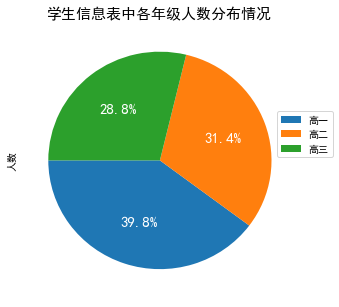

In [228]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(5,5))
fig.set(alpha=0.2)

# 当前学期各年级人数分布
student_info1=student_info
renshu=student_info1['年级名'].value_counts()
labels=renshu.index
renshu.plot(kind='pie',labels=labels,shadow=False,autopct='%1.1f%%',startangle=180,textprops={'fontsize': 15, 'color': 'w'})
plt.title('学生信息表中各年级人数分布情况',fontsize=15)
plt.ylabel('人数')
plt.legend(bbox_to_anchor=(0.9, 0.7))
plt.xticks(rotation=0)
plt.show()

In [387]:
student_info1=student_info
from pyecharts import Pie
RENSHU=student_info1['年级名'].value_counts()
Index=RENSHU.index
Value=RENSHU.values
pie=Pie('学生信息表中各年级人数分布',width=500,height=300)
pie.add('人数',Index,Value,is_random=True,radius=[30,50],is_legend_show=False,is_label_show=True)
pie.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息表中各年级人数分布.html')
pie

#### 1.1.2  出生年人数分布

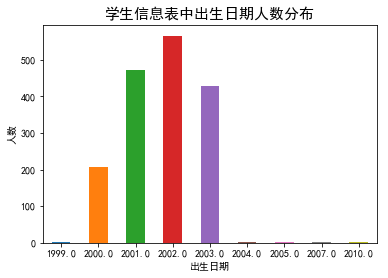

In [231]:
student_info2=student_info
shaixuan=student_info2[-np.isnan(student_info2['出生日期'])]
chusheng=shaixuan.groupby(['出生日期'])['学生id'].count()
chusheng=chusheng.sort_index()
chusheng.plot(kind='bar',fontsize=10)
plt.title('学生信息表中出生日期人数分布',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('人数',fontsize=10)
plt.show()

In [233]:
student_info2=student_info
NOT_NULL=student_info2[-np.isnan(student_info2['出生日期'])]  # 删除空值行
CHUSHENG=NOT_NULL.groupby(['出生日期'])['学生id'].count()
CHUSHENG=CHUSHENG.sort_index()
from pyecharts import Bar
bar=Bar('学生信息表出生年人数分布')
bar.add('人数',CHUSHENG.index,CHUSHENG.values,is_label_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息表出生年人数分布.html')
bar

#### 1.1.3  各年级中出生年人数分布

Text(0,0.5,'人数')

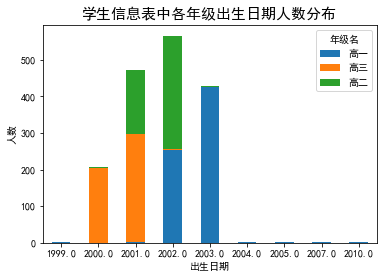

In [234]:
student_info2=student_info
NOT_NULL=student_info2[-np.isnan(student_info2['出生日期'])]  # 删除空值行
fenzu=NOT_NULL.groupby(['出生日期','年级名'])['学生id'].count().unstack()
fenzu=fenzu.sort_index()
fenzu.plot(kind='bar',stacked=True,fontsize=10)
plt.title('学生信息表中各年级出生日期人数分布',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('人数',fontsize=10)

In [235]:
BIRTHDAY=NOT_NULL.groupby(['出生日期','年级名'])['学生id'].count().reset_index()
FIRST=BIRTHDAY.ix[BIRTHDAY['年级名']=='高一']
SECOND=BIRTHDAY.ix[BIRTHDAY['年级名']=='高二']
THIRD=BIRTHDAY.ix[BIRTHDAY['年级名']=='高三']
from pyecharts import Bar
bar=Bar('学生信息表各年级出生年人数分布')
bar.add('高三',THIRD['出生日期'].values,THIRD['学生id'].values,is_stack=True)
bar.add('高二',SECOND['出生日期'].values,SECOND['学生id'].values,is_stack=True)
bar.add('高一',FIRST['出生日期'].values,FIRST['学生id'].values,is_stack=True,xaxis_name='出生年')
bar.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息表各年级出生年人数分布.html')
bar

#### 1.1.4  各年级年龄人数分布

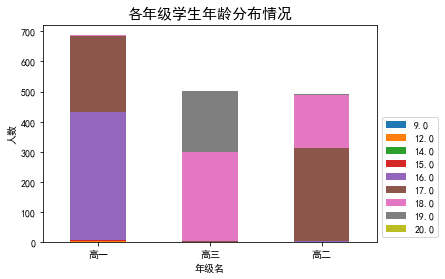

In [236]:
### 层次化索引的可视化
student_info3=student_info
student_info3['年龄']=2019-student_info3['出生日期']
bp=student_info3.groupby(['年级名','年龄'])['学生id'].count().unstack()
bp.plot(kind='bar',stacked=True) # 进行堆叠
plt.title('各年级学生年龄分布情况',fontsize=15)
plt.ylabel('人数')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xticks(rotation=0)
plt.show()

In [237]:
NOT_NULL['年龄']=2019-NOT_NULL['出生日期']
AGE=NOT_NULL.groupby(['年级名','年龄'])['学生id'].count().reset_index()
FIRST1=AGE.ix[AGE['年级名']=='高一']
SECOND1=AGE.ix[AGE['年级名']=='高二']
THIRD1=AGE.ix[AGE['年级名']=='高三']
from pyecharts import Bar
bar=Bar('学生信息各年龄人数分布')
bar.add('高三',THIRD1['年龄'].values,THIRD1['学生id'].values,is_stack=True)
bar.add('高二',SECOND1['年龄'].values,SECOND1['学生id'].values,is_stack=True)
bar.add('高一',FIRST1['年龄'].values,FIRST1['学生id'].values,is_stack=True,xaxis_name='年龄')
bar.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息表各年龄人数分布.html')
bar

#### 1.1.5  年级中班级数和年级人数

In [386]:
# 各年级中班级数量
banji=student_info.groupby(['年级名'])['班级名'].unique()
renshu=student_info.groupby(['年级名'])['学生id'].count()
value1=banji.values
value2=renshu.values
label=banji.index
for i in range(len(value1)):
    value1[i]=len(value1[i])
    
from pyecharts import Bar,Line,Overlap
bar=Bar('各年级班级数及学生数量')
bar.add('班级数量',label,value1,legend_top="7%",legend_pos='left',yaxis_name='班级数',label_color=['#CCCCCC'])
line=Line()
line.add('学生数量',label,value2,yaxis_name='年级人数',line_width='2',)
overlap=Overlap(width=500,height=300)
overlap.add(bar)
overlap.add(line,is_add_yaxis=True, yaxis_index=1)
overlap.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息表年级班级数和年级人数.html')
overlap

#### 1.1.6  各班人数

Text(0.5,0,'人数')

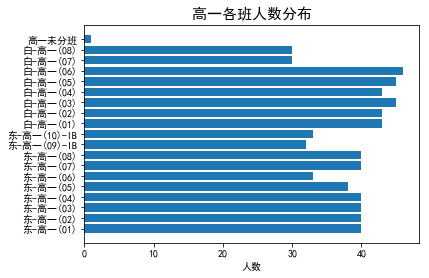

In [239]:
# 每个班级人数
gaoyi=student_info.ix[student_info['年级名']=='高一']
gaoyi=gaoyi.groupby(['班级名'])['学生id'].count()
label=gaoyi.index
value=gaoyi.values
plt.barh(label,value)# 默认是折线图 plt.plot;柱状图:plt.bar
plt.title('高一各班人数分布',fontsize=15)
plt.xlabel('人数')

### 利用 Grid 解决 dataZoom 与 X 轴标签重叠问题

In [240]:
# 各班人数分布
num=student_info.groupby(['班级名'])['学生id'].count()
from pyecharts import Bar,Grid
grid=Grid()
bar=Bar('各班级人数')
bar.add('人数',num.index,num.values,label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
# 把 bar 加入到 grid 中，并适当调整 grid_bottom 参数，使 bar 图整体上移---》利用 Grid 解决 dataZoom 与 X 轴标签重叠问题
grid.add(bar,grid_bottom='25%')
grid.render(path=r'D:\Entertainment\Heaven Pool\basic_information\各班级人数.html')
grid

### 1.2  性别分布

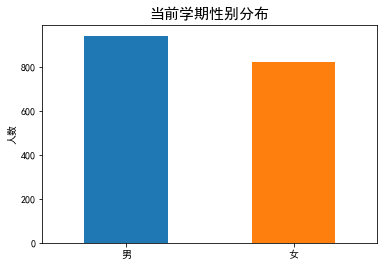

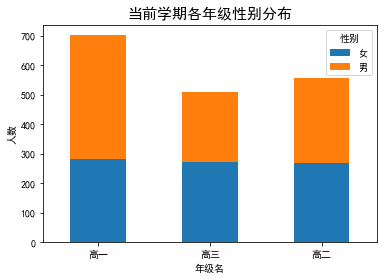

In [241]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig=plt.figure(figsize=(6,4))
fig.set(alpha=0.2)

 # 在一张大图里分别分列几个小图
#plt.subplot(2,1,1) # 要生成两行两列，这是第一个图plt.subplot('行','列','编号')
student_info['性别'].value_counts().plot(kind='bar')
plt.title('当前学期性别分布',fontsize=15)
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

#plt.subplot(2,1,2) #这是第二个图
xingbei=student_info.groupby(['年级名','性别'])['学生id'].count().unstack()
xingbei.plot(kind='bar',stacked=True)
plt.title('当前学期各年级性别分布',fontsize=15)
plt.ylabel('人数')
# plt.legend()标签
plt.xticks(rotation=0)

plt.show()

In [385]:
Gender=student_info['性别'].value_counts()
Percent=round(Gender/Gender.sum(),4)
from pyecharts import Liquid
liquid = Liquid("全校男同学占比",width=500,height=300)
liquid.add("男",[Percent['男']], is_liquid_outline_show=False)
liquid.render(path=r'D:\Entertainment\Heaven Pool\basic_information\全校男生占比.html')
liquid

In [394]:
# 多个饼图放在一张图中
Gender_grade=student_info.groupby(['年级名','性别'])['学生id'].count().reset_index()
First=Gender_grade.ix[Gender_grade['年级名']=='高一']
Second=Gender_grade.ix[Gender_grade['年级名']=='高二']
Third=Gender_grade.ix[Gender_grade['年级名']=='高三']

from pyecharts import Pie,Style
pie=Pie('各年级中男女生占比',width=600,height=400)
style=Style()
pie_style=style.add(label_pos="center",is_label_show=True,label_text_color=['#FFFF0'])
pie.add('高一',First['性别'].values,First['学生id'].values,center=[10, 40], radius=[18, 24], **pie_style)
pie.add('高二',Second['性别'].values,Second['学生id'].values,center=[40, 40], radius=[18, 24], **pie_style)
pie.add('高三',Third['性别'].values,Third['学生id'].values,center=[70, 40], radius=[18, 24],legend_top="top", **pie_style)
pie.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生信息各年级男女生占比.html')
pie

### 1.3  退学分布

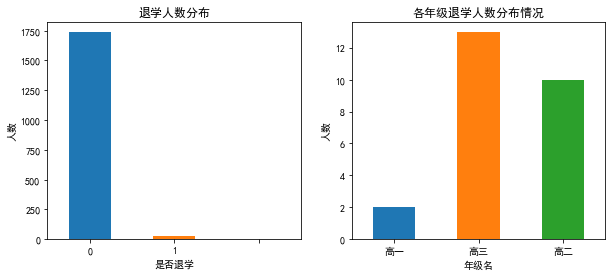

In [242]:
student_info4=student_info
fig=plt.figure(figsize=(10,4))
fig.set(alpha=0.2)
plt.subplot(1,2,1) 
# student_info['是否退学'].value_counts().plot(kind='bar')
student_info4['是否退学'].fillna(value='0').value_counts().plot(kind='bar') #将NaN替换为0
plt.title('退学人数分布')
plt.xlabel('是否退学')
plt.ylabel('人数')
plt.xticks(rotation=0)
#plt.grid(True)# 是否添加网格


plt.subplot(1,2,2)
po=student_info4.ix[student_info['是否退学']=='1'] # 筛选出退学的学生
po.groupby(['年级名'])['学生id'].count().plot(kind='bar')
# po.groupby('年级名')['学生id'].sort_values(by="学生id",ascending=False).reset_index().plot(kind='bar')
# student_info.ix[student_info['是否退学']=='1'].groupby([student_info['年级名']]).plot(kind='bar')
plt.title(u'各年级退学人数分布情况')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

##### 从学生分布图中可知：2018-2019年第1个学期中，人数：高三＜高二<高一；男女人数大致相等

In [384]:
# 退学学生分布
Drop_out=student_info4.ix[student_info4['是否退学']=='1']
Drop_out=Drop_out.groupby(['年级名'])['学生id'].count().reset_index()
from pyecharts import Funnel
funnel=Funnel('各年级退学人数',width=500,height=300)
funnel.add('人数',Drop_out['年级名'].values,Drop_out['学生id'].values,is_label_show=True,label_pos='inside',funnel_gap=5)
funnel.render(path=r'D:\Entertainment\Heaven Pool\basic_information\退学人数分布.html')
funnel

### 1.4  住址分布

In [244]:
student_info5=student_info
zhuzhi=student_info5.ix[-student_info5["家庭住址"].isnull()]# 删除住址为空的行

zhuzhi['籍贯']=zhuzhi['家庭住址']
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('安徽')]='安徽'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('合肥')]='安徽'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('北京')]='北京'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('福建')]='福建'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('河南')]='河南'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('四川')]='四川'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('河北')]='河北'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('湖南')]='湖南'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('湖北')]='湖北'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('江苏')]='江苏'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('江西')]='江西'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('浙江')]='浙江'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('山西')]='山西'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('重庆')]='重庆'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('陕西')]='陕西'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('山东')]='山东'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('宁波')]='浙江'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('黑龙江')]='黑龙江'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('杭州')]='浙江'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('甘肃')]='甘肃'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('辽宁')]='辽宁'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('天津')]='天津'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('贵州')]='贵州'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('广东')]='广东'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('吉林')]='吉林'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('温州')]='浙江'
zhuzhi['籍贯'][zhuzhi['籍贯'].str.contains('上海')]='上海'
# 替换浙江
zejiang=['绍兴','岱山','慈溪','海曙','鄞州','嘉兴','三门','浙甬','嵊州', '余姚', '新昌','舟山定海', '建德','义乌' , '奉化' ,'衢州', '宁海',  '浦江','台州椒江区','奉化区','诸暨', '富阳','台州','东阳','象山','上虞', '贵州', '乐清', '象山县', '黄岩' ,'东阳市' ,'乐清市','吉安','鞍山','江北','桐庐','宁海县桃源街','咸祥镇','丽水','嘉兴海盐', '嘉善县', '皖','慈溪市','绍兴市上虞区','鄞州区高桥镇','舟山市岱山县','鄞州区',
'绍兴市柯桥区','海曙区' ]

for i in range(zhuzhi.shape[0]):
        if zhuzhi.iloc[i,16] in zejiang:
            zhuzhi.iloc[i,16]='浙江'   
zhuzhi=zhuzhi.reset_index()#reset_index可以还原索引，重新变为默认的整型索引 

# 删除汉和中国
shanchu=['汉','中国','汉族']
for j in range(zhuzhi.shape[0]):
    if zhuzhi.ix[j,'籍贯'] in shanchu:
        zhuzhi=zhuzhi.drop([j])
print(zhuzhi['籍贯'].unique())

['浙江' '江西' '河南' '四川' '湖南' '黑龙江' '江苏' '陕西' '湖北' '山东' '安徽' '福建' '河北' '山西'
 '广西' '甘肃' '北京' '台湾台北' '上海' '吉林' '广东' '重庆' '辽宁' '天津']


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text xticklabel objects>)

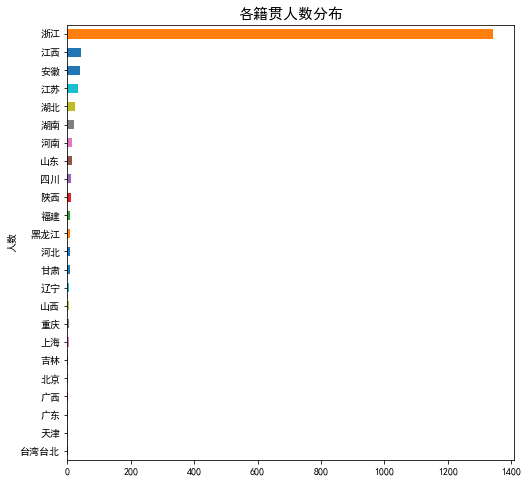

In [245]:
fig=plt.figure(figsize=(8,8))
fig.set(alpha=0.2)
zhuzhi1=zhuzhi.groupby(['籍贯'])['学生id'].count()
zhuzhi1=zhuzhi1.sort_values()
zhuzhi1.plot(kind='barh') 
plt.title('各籍贯人数分布',fontsize=15)
plt.ylabel('人数')
plt.xticks(rotation=0)

In [249]:
from pyecharts import Geo
data = [
    ("台湾", 1),("天津", 1),("广东", 1),("北京", 2),("吉林", 2),("上海", 4),
    ("重庆", 5),("山西", 5),("辽宁", 6),("甘肃", 7),("河北", 7),("黑龙江", 7),
    ("福建", 9),("陕西", 11),("四川", 12),("山东", 13),("河南", 14),("湖南", 22),("湖北", 23),("江苏", 35),("安徽", 39),("江西", 42),("浙江", 1341)]
geo = Geo("各省市学生人数分布", "删除空值、不正确填写", title_color="#fff", width=1000, height=500, background_color='#404a59')
attr, value = geo.cast(data)
geo.add("", attr, value, visual_range=[0, 200], visual_text_color="#fff", symbol_size=15, is_visualmap=True)
#geo.show_config()
geo.render(path=r'D:\Entertainment\Heaven Pool\basic_information\学生籍贯.html')
geo

### 1.5  教师分布

In [250]:
laoshi=pd.merge(student_info,teacher,on=['班级名','年级名','班级id'])
#筛选特定的列 
laoshi1=laoshi[['学生id','班级id','班级名','年级名','学期','学科id','学科名','教师id','教师名']] # laoshi.ix[:,['m1','m2']]
print(laoshi['学期'].unique())
print("教师id的数量",laoshi['教师id'].unique().shape[0])
print('教师名数量：',laoshi['教师名'].unique().shape[0])
laoshi1.head()

['2018-2019-1']
教师id的数量 130
教师名数量： 61


,学生id,班级id,班级名,年级名,学期,学科id,学科名,教师id,教师名
0,14454,901,白-高二(01),高二,2018-2019-1,1,语文,51,顾老师
1,14454,901,白-高二(01),高二,2018-2019-1,2,数学,73,戴老师
2,14454,901,白-高二(01),高二,2018-2019-1,3,英语,106,朱老师
3,14454,901,白-高二(01),高二,2018-2019-1,4,物理,249,杨老师
4,14454,901,白-高二(01),高二,2018-2019-1,5,化学,161,王老师


#### 1.5.1  各年级教师人数

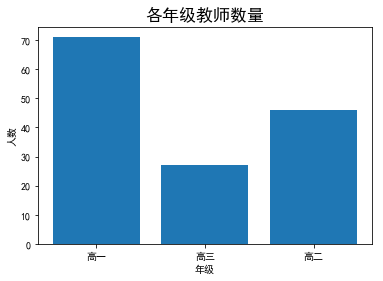

In [251]:
# 各年级中教师数量
xueke=laoshi1.groupby(['年级名'])['教师id'].unique()
values=xueke.values
label=xueke.index

# 对多维数组进行计次操作
for i in range(len(values)):
    values[i]=len(values[i])
    
import matplotlib.pyplot as plt
plt.bar(label,values)
plt.title('各年级教师数量',fontsize=17)
plt.ylabel('人数')
plt.xlabel('年级')
plt.show()

In [380]:
NUM=laoshi.groupby(['年级名'])['教师id'].unique()
Values=NUM.values
# 对多维数组进行计次操作
for i in range(len(Values)):
    Values[i]=len(Values[i])
    
from pyecharts import Pie
pie=Pie('各年级教师人数',width=500,height=300)
pie.add('人数',NUM.index,Values,is_random=True,is_legend_show=False,is_label_show=True)
pie.render(path=r'D:\Entertainment\Heaven Pool\basic_information\各年级教师人数.html')
pie

#### 1.5.2 各年级各科学教师数量

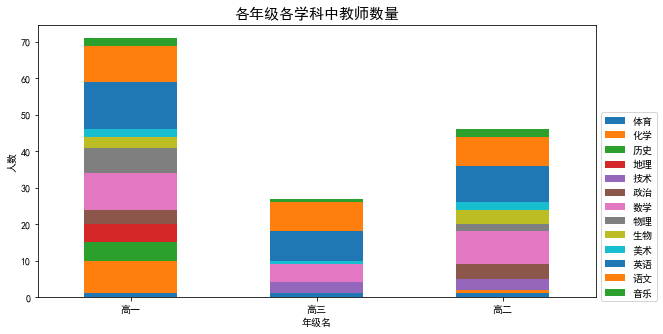

In [44]:
# 各年级各学科中教师数量
nianji=laoshi1.groupby(['年级名','学科名'])['教师id'].unique()
value1=nianji.values
label=nianji.index
for i in range(len(value1)):
    value1[i]=len(value1[i])
nianji=nianji.unstack()
# 将DataFrame中各列的数据分配到不同的子图中
nianji.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('各年级各学科中教师数量',fontsize=15)
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,0.7))
plt.show()

#### 1.5.3  教师教授的班级量

In [336]:
Teacher=pd.merge(student_info,teacher,on=['班级名','年级名','班级id'])
NUM_Class=Teacher.groupby(['学期','教师id','教师名'])['班级名'].unique().reset_index()
TEACHER=teacher[['教师id','教师名','学科名']].drop_duplicates(['教师id','教师名'])
TEA_INFO=pd.merge(NUM_Class,TEACHER,on=['教师id','教师名'])
TEA_INFO.to_excel(r'D:\Entertainment\Heaven Pool\basic_information\教师所教班级.xls')

### 1.6 住校学生占比

In [381]:
student_info6=student_info
NUM=student_info6.shape[0]
LIVE=student_info6.ix[student_info6['是否住校']==1.0]
LIVE_NUM=LIVE['是否住校'].count()
from pyecharts import Liquid
liquid = Liquid("住校同学占比",width=500,height=300)
liquid.add("人数",[LIVE_NUM/NUM], is_liquid_outline_show=False)
liquid.render(path=r'D:\Entertainment\Heaven Pool\basic_information\住校生占比.html')
liquid

### 1.7 少数民族同学占比

In [382]:
student_info7=student_info
NUM=student_info7.shape[0]
NATION=student_info7.ix[student_info7['民族']!='汉族']
NATION_NUM=NATION['民族'].count()
from pyecharts import Liquid
liquid = Liquid("少数民族同学占比",width=500,height=300)
liquid.add("人数",[NATION_NUM/NUM], is_liquid_outline_show=False)
liquid.render(path=r'D:\Entertainment\Heaven Pool\basic_information\少数民族占比.html')
liquid

In [383]:
NATION_TYPE=NATION.groupby(['民族'])['学生id'].count()
NATION_TYPE.sort_values(inplace=True)
from pyecharts import Bar
bar=Bar('少数民族人数',width=500,height=300)
bar.add('人数',NATION_TYPE.index,NATION_TYPE.values)
bar.render(path=r'D:\Entertainment\Heaven Pool\basic_information\少数民族人数.html')
bar

## 小插曲

In [11]:
sex_table=student_info.groupby(['年级名','性别']).count()
sex_table#是一个dataframe

学生id  学生姓名   民族  出生日期  班级名  家庭住址  家庭类型  政治面貌  班级id  班级学期  是否住校  是否退学  \
年级名 性别                                                                         
高一  女    282   282  282   277  282   271   282   282   282   282   137     0   
    男    420   420  420   411  420   401   420   420   420   420   305     2   
高三  女    271   271  271   268  271   265   271   271   271   271    36     6   
    男    237   237  237   234  237   233   237   237   237   237    49     8   
高二  女    269   269  269   240  269   231   269   269   269   269    57     4   
    男    286   286  286   252  286   239   286   286   286   286   124     6   

        宿舍号   年龄  
年级名 性别            
高一  女   137  277  
    男   305  411  
高三  女    36  268  
    男    49  234  
高二  女    57  240  
    男   124  252

In [12]:
# 从层次化索引中取出其中的任意一列
sex_class_id=sex_table['学生id']
sex_class_id # 是一个series

年级名  性别
高一   女     282
     男     420
高三   女     271
     男     237
高二   女     269
     男     286
Name: 学生id, dtype: int64

In [13]:
# 只要把它的双重索引转化为xy索引的dataframe，就可以画出需要的图了
sex_class_id.unstack()#stack:堆叠，堆积；unstack():不要堆叠
# 其实是对dataframe画图

性别,女,男
年级名,,
高一,282,420
高三,271,237
高二,269,286
